# Internals 1 - Sudhanva - PES1201702260

## SVM classification with grid search on 'c' and 'gamma' parameter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df[['job', 'marital', 'education','default','housing','loan', 'contact', 'month', 'poutcome', 'y']] = df[['job', 'marital', 'education','default','housing','loan', 'contact', 'month', 'poutcome', 'y']].apply(labelencoder.fit_transform)

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


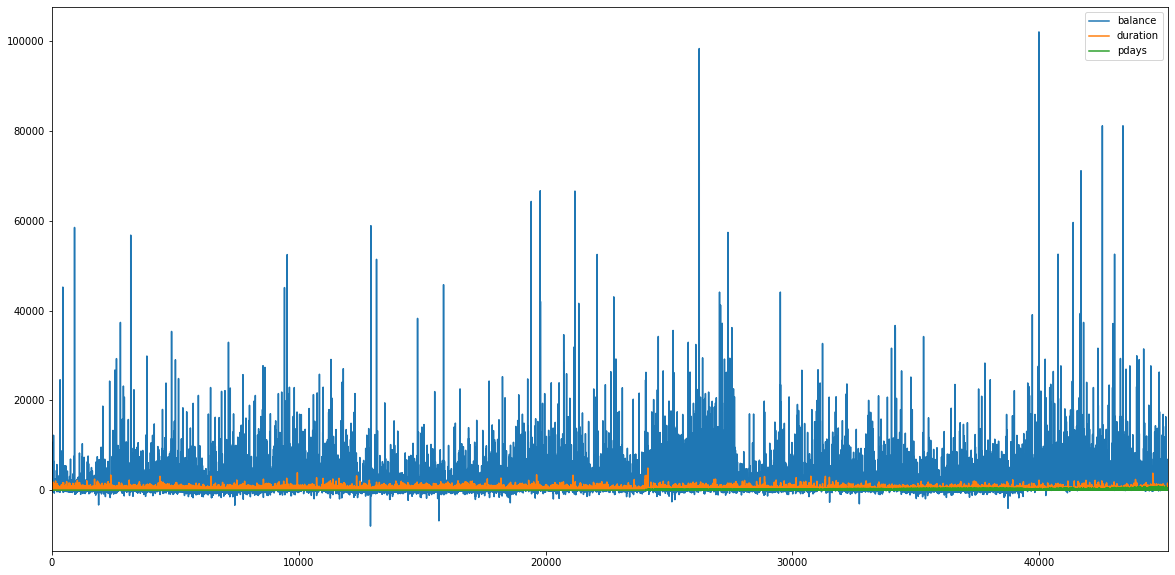

In [8]:
df[['balance', 'duration', 'pdays']].plot(figsize=(20,10))
plt.show()

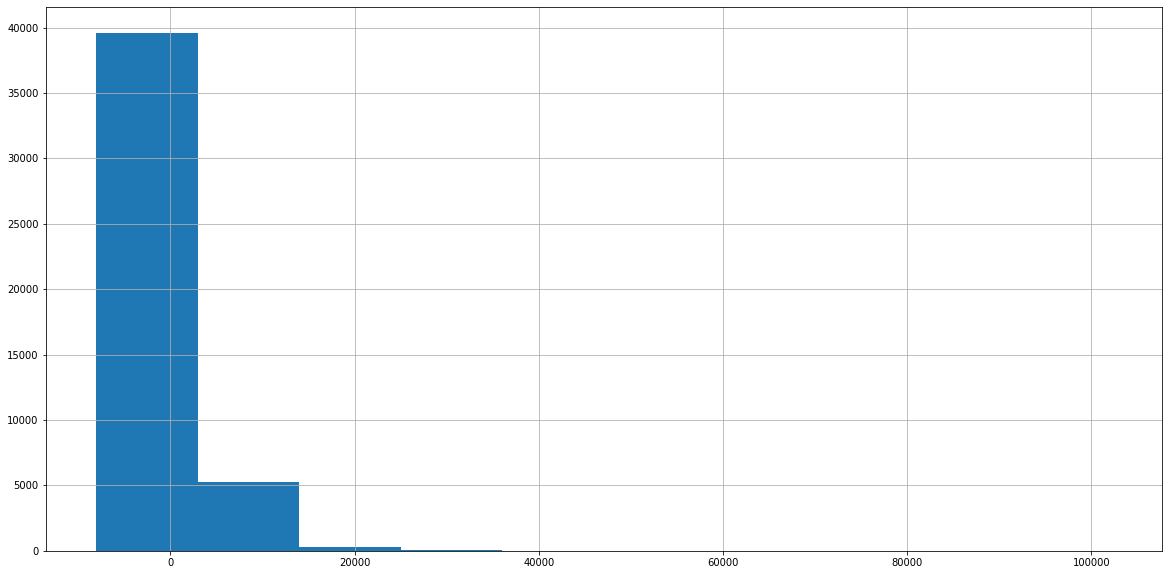

In [7]:
df['balance'].hist(figsize=(20, 10))

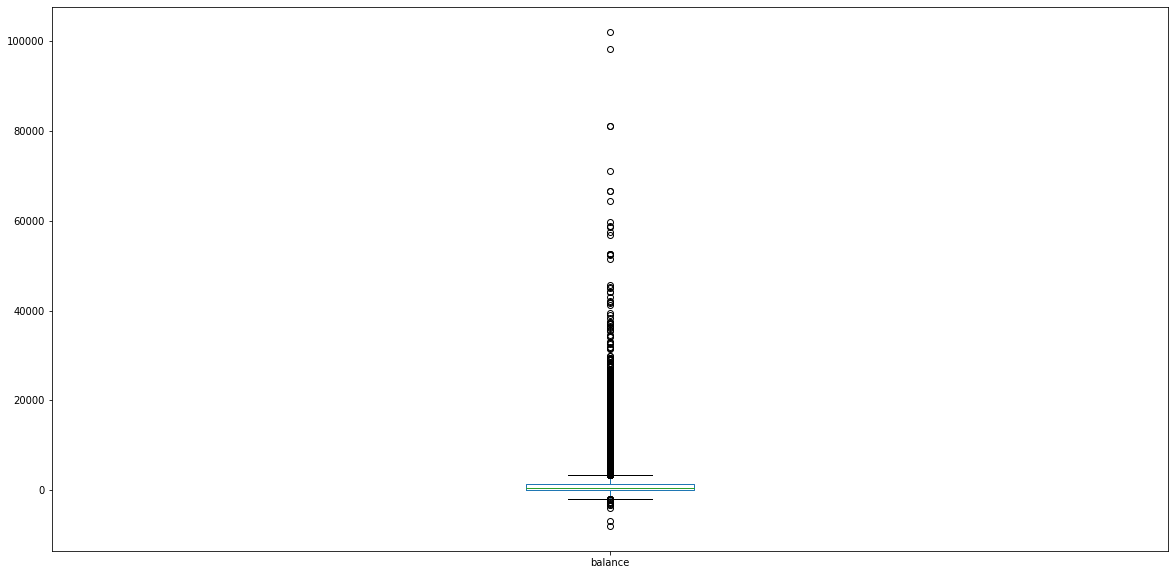

In [11]:
df['balance'].plot(figsize=(20, 10), kind='box')

In [14]:
df['balance'].quantile(0.999)

32892.77000000214

In [15]:
from scipy import stats

In [17]:
z = np.abs(stats.zscore(df['balance']))
print(z)

[0.25641925 0.43789469 0.44676247 ... 1.42959305 0.22802402 0.52836436]


In [19]:
threshold = 3
print(np.where(z > 3))

(array([   34,    69,   334,   446,   920,  2065,  2343,  2479,  2554,
        2576,  2618,  2619,  2778,  2852,  2899,  2931,  2938,  3012,
        3024,  3099,  3197,  3327,  3500,  3806,  3851,  4025,  4081,
        4135,  4150,  4483,  4583,  4625,  4846,  4851,  4954,  4958,
        4965,  4975,  5007,  5133,  5249,  5279,  5302,  5306,  5309,
        5464,  5613,  5725,  5937,  6342,  6429,  6431,  6529,  6619,
        6779,  6825,  6876,  7014,  7079,  7156,  7169,  7198,  7200,
        7229,  7334,  7362,  7534,  7563,  7627,  7674,  7681,  7743,
        7782,  7822,  7865,  7991,  8008,  8184,  8196,  8244,  8335,
        8349,  8377,  8433,  8472,  8479,  8534,  8555,  8588,  8634,
        8700,  8724,  8828,  8854,  9047,  9068,  9079,  9117,  9162,
        9178,  9239,  9312,  9421,  9425,  9461,  9472,  9536,  9552,
        9564,  9576,  9598,  9625,  9778,  9793,  9803,  9809,  9822,
        9895,  9933, 10038, 10059, 10061, 10062, 10107, 10173, 10180,
       10260, 10262

In [24]:
zz = lambda x: np.abs(stats.zscore(x))

In [26]:
df['balance'].apply(zz)

IndexError: tuple index out of range

In [9]:
df[df['balance'] < 1].count()

age          7280
job          7280
marital      7280
education    7280
default      7280
balance      7280
housing      7280
loan         7280
contact      7280
day          7280
month        7280
duration     7280
campaign     7280
pdays        7280
previous     7280
poutcome     7280
y            7280
dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
df[['age', 'balance', 'duration', 'pdays']] = scaler.fit_transform(df[['age', 'balance', 'duration', 'pdays']])

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,4,1,2,0,0.092259,1,0,2,5,8,0.053070,1,0.0,0,3,0
1,0.337662,9,2,1,0,0.073067,1,0,2,5,8,0.030704,1,0.0,0,3,0
2,0.194805,2,1,1,0,0.072822,1,1,2,5,8,0.015453,1,0.0,0,3,0
3,0.376623,1,1,3,0,0.086476,1,0,2,5,8,0.018707,1,0.0,0,3,0
4,0.194805,11,2,3,0,0.072812,0,0,2,5,8,0.040260,1,0.0,0,3,0


In [13]:
X = df.iloc[:, 0:15].values
y = df['y'].values

In [14]:
print(X.shape)
print(y.shape)

(45211, 15)
(45211,)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [17]:
from sklearn.svm import SVC

In [18]:
classifier = SVC(C = 1.0, gamma='scale')
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
accuracy_score(y_test, y_pred)

0.8830428954423593

In [24]:
print(classification_report(y_test, y_pred ,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13175

   micro avg       0.88      1.00      0.94     13175
   macro avg       0.88      1.00      0.94     13175
weighted avg       0.88      1.00      0.94     13175



In [25]:
confusion_matrix(y_test, y_pred)

array([[13175,     0],
       [ 1745,     0]])

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid = {
    'C':[1, 10, 100, 1000],
    'gamma':[1, 0.1, 0.001, 0.0001]
}

In [28]:
grid_search = GridSearchCV(classifier, param_grid = grid, cv = 5, refit = True, verbose=2, n_jobs = -1)

In [29]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/home/sudhanva/anaconda3/envs/tf114gpu/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 12.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [30]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.001}

In [31]:
y_pred_grid = grid_search.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred_grid)

0.8867962466487935

In [33]:
print(classification_report(y_test, y_pred_grid ,labels=np.unique(y_pred_grid)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     13175
           1       0.64      0.07      0.13      1745

    accuracy                           0.89     14920
   macro avg       0.76      0.53      0.54     14920
weighted avg       0.86      0.89      0.85     14920



In [34]:
confusion_matrix(y_test, y_pred_grid)

array([[13101,    74],
       [ 1615,   130]])